# Working With Sample Images

Some useful techniques to get you started.

In [25]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path

You should be able to copy this `load_image` function into your own notebooks and load the shared sample images.

In [ ]:
def load_image(image):
    home = str(Path.home())
    path = "{}/notebooks/strykeforce/vision/2019 DEEP SPACE/kickoff/{}".format(home, image)
    return cv2.imread(path)

## Display Camera Image
OpenCV loads images in BGR order, we convert to RGB so colors look right on our display.

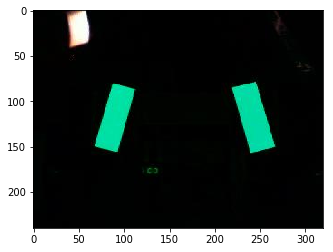

In [26]:
image = load_image("CargoSideStraightDark36in.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## Display Mask of In-Range Pixels
These are pixels that have a HSV value between `hsv_lower` and `hsv_upper`.

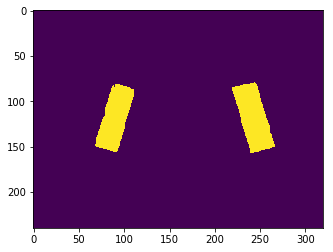

In [27]:
hsv_lower = (80, 100, 100)
hsv_upper = (100, 255, 255)

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, hsv_lower, hsv_upper)
plt.imshow(mask)

## Display Contours
Find and display the two largest contours in red.

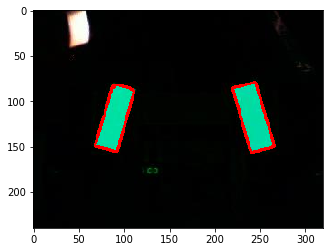

In [31]:
_, contours, _ = cv2.findContours(mask.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
sorted_contours = sorted(contours, key = cv2.contourArea, reverse = True)
cv2.drawContours(image, sorted_contours[:2], -1, (0, 0, 255), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))